# Import Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1.Define the non-linear equation and generate synthetic data.

we will consider a non-linear equation involving three variables (x1,x2,x3):

y=sin(x1)+ (x2)**2 −log(1+∣x3∣)

In [8]:
# Generate synthetic data
np.random.seed(42)
x = np.random.uniform(-3, 3, (1000, 3))
y = np.sin(x[:, 0]) + x[:, 1]**2 - np.log(1 + np.abs(x[:, 2])) + np.random.normal(0, 0.1, x.shape[0])
y = y.reshape(-1, 1)  # Reshape y to match output dimensions (1000, 1)


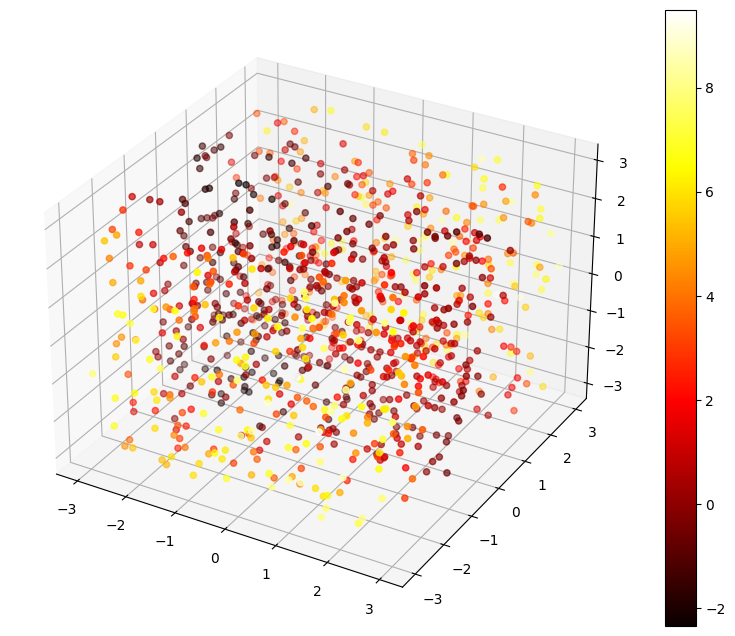

In [9]:
# 4D plot function
def plot_4d(x, y):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    img = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap=plt.hot())
    fig.colorbar(img)
    plt.show()

# Plotting the synthetic data
plot_4d(x, y)

# Step 2: Initialize Network Parameters

In [10]:
# Initialize parameters
def initialize_parameters(input_size, hidden_layer_size, output_size):
    np.random.seed(42)
    parameters = {
        'W1': np.random.randn(input_size, hidden_layer_size) * 0.1,
        'b1': np.zeros((1, hidden_layer_size)),
        'W2': np.random.randn(hidden_layer_size, hidden_layer_size) * 0.1,
        'b2': np.zeros((1, hidden_layer_size)),
        'W3': np.random.randn(hidden_layer_size, output_size) * 0.1,
        'b3': np.zeros((1, output_size)),
    }
    return parameters

In [11]:
# Activation functions
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

# Step 3: Forward Propagation

In [12]:
# Forward propagation
def forward_propagation(X, parameters):
    Z1 = np.einsum('ij,jk->ik', X, parameters['W1']) + parameters['b1']
    A1 = relu(Z1)
    Z2 = np.einsum('ij,jk->ik', A1, parameters['W2']) + parameters['b2']
    A2 = relu(Z2)
    Z3 = np.einsum('ij,jk->ik', A2, parameters['W3']) + parameters['b3']
    A3 = Z3  # No activation for the last layer in regression
    cache = (Z1, A1, Z2, A2, Z3, A3)
    return A3, cache

In [13]:
# Compute loss
def compute_loss(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

# Step 4: Backpropagation

In [14]:
# Backpropagation
def backpropagation(X, y, cache, parameters):
    Z1, A1, Z2, A2, Z3, A3 = cache
    m = y.shape[0]

    dZ3 = A3 - y
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dA2 = np.dot(dZ3, parameters['W3'].T)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, parameters['W2'].T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    gradients = {'dW3': dW3, 'db3': db3, 'dW2': dW2, 'db2': db2, 'dW1': dW1, 'db1': db1}
    return gradients



# Step 5: Parameter Update


In [15]:
# Update parameters
def update_parameters(parameters, gradients, learning_rate):
    parameters['W1'] -= learning_rate * gradients['dW1']
    parameters['b1'] -= learning_rate * gradients['db1']
    parameters['W2'] -= learning_rate * gradients['dW2']
    parameters['b2'] -= learning_rate * gradients['db2']
    parameters['W3'] -= learning_rate * gradients['dW3']
    parameters['b3'] -= learning_rate * gradients['db3']
    return parameters

# Step 6: Training the model

In [19]:
# Training the model
input_size = 3
hidden_layer_size = 64
output_size = 1
parameters = initialize_parameters(input_size, hidden_layer_size, output_size)

epochs = 1000
learning_rate = 0.01
losses = []

for epoch in range(epochs):
    y_pred, cache = forward_propagation(x, parameters)
    loss = compute_loss(y, y_pred)
    losses.append(loss)
    gradients = backpropagation(x, y, cache, parameters)
    parameters = update_parameters(parameters, gradients, learning_rate)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')



Epoch 0, Loss: 14.12562304517864
Epoch 100, Loss: 2.776099098276894
Epoch 200, Loss: 0.8362724630509326
Epoch 300, Loss: 0.40798154990534213
Epoch 400, Loss: 0.3350258495789258
Epoch 500, Loss: 0.30628488829834477
Epoch 600, Loss: 0.2821905901580605
Epoch 700, Loss: 0.26085299481778207
Epoch 800, Loss: 0.2404237722758064
Epoch 900, Loss: 0.22112910110300982


# Step 6: Plotting Training Loss vs Epochs and Actual vs Predicted

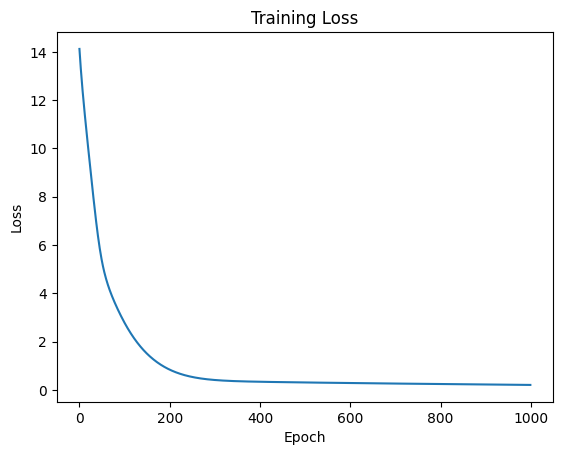

In [20]:
# Plot training loss
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

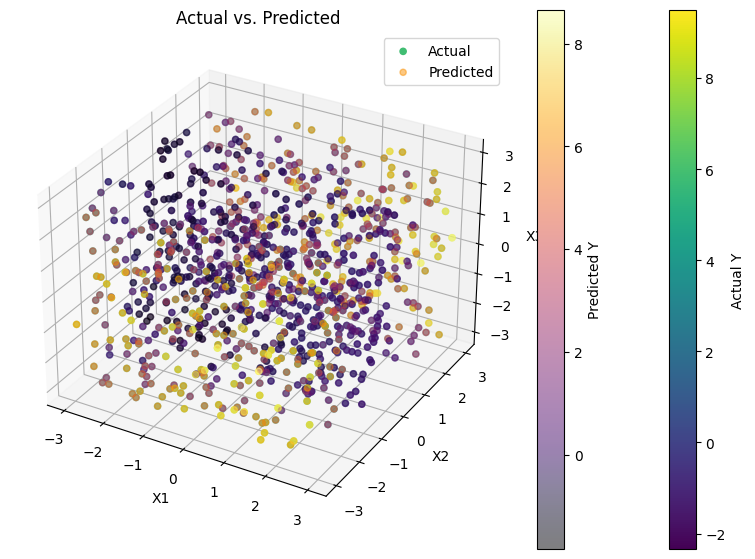

In [21]:

# Predict using the final parameters
final_y_pred, _ = forward_propagation(x, parameters)

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Actual values
img1 = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y.flatten(), cmap='viridis', label='Actual')
# Predicted values
img2 = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=final_y_pred.flatten(), cmap='inferno', alpha=0.5, label='Predicted')

# Creating a legend and titles
plt.title('Actual vs. Predicted')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
fig.colorbar(img1, label='Actual Y')
fig.colorbar(img2, label='Predicted Y')
plt.legend()
plt.show()
